# E3 - Global Power Plant Database


## Problem Statement:

Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available. 

#### Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

In [51]:
#importing all the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import os

In [2]:
#getting data
os.chdir("C:\GitBash\Files")
df = pd.read_csv("database_IND.csv")

## DATA INSPECTION 

In [3]:
df.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
df.sample(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
646,IND,India,RELIANCE ENERGY,IND0000373,48.00,15.3771,73.8770,Gas,NaN,NaN,...,2019.0,NaN,12.21400,0.0000,0.00000,NaN,0.0,NaN,Central Electricity Authority,NaN
612,IND,India,Powerica Kutch Wind Farm,WRI1026788,14.85,23.1897,70.6216,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
676,IND,India,S.SAROVAR RBPH,IND0000383,1200.00,21.8301,73.7501,Hydro,NaN,NaN,...,2019.0,NaN,2286.26125,1458.5506,2321.20565,374.72695,0.0,NaN,Central Electricity Authority,NaN
814,IND,India,TROMBAY GT,IND0000463,180.00,19.0018,72.8967,Gas,NaN,NaN,...,2019.0,NaN,1119.27000,1149.0000,1372.00000,1314.00000,1371.0,NaN,Central Electricity Authority,NaN
223,IND,India,GAUTAMI CCCP,IND0000125,468.57,17.0386,82.1286,Gas,NaN,NaN,...,2019.0,NaN,0.00000,100.6500,0.00000,0.00000,0.0,NaN,Central Electricity Authority,NaN


In [5]:
df.tail(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [7]:
#shape of data
df.shape

(907, 27)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [9]:
#lets chcekk the null values
df.isnull().sum()


country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

OBSERVATION

We have high number of null values in the datasets.

In [10]:
# Checking number of unique values in each column
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

OBSERVATION

Columns country, country_long, other_fuel2, year_of_capacity_data and generation_data_source have only one unique value. Also other_fuel3, wepp_id,generation_gwh_2013, generation_gwh_2019, estimated_generation_gwh have no unique values which means they are filled with only NAN values. Since these columns have same entries thoughout the dataset so we can drop these columns.

##### DROPPING COLUMS 

In [11]:
# Checking the count of the country
df["country"].value_counts()

IND    907
Name: country, dtype: int64


Only IND is listed in the country hence there is no impact of this feature on prediction

In [12]:
# Checking the count of the country_long
df["country_long"].value_counts()

India    907
Name: country_long, dtype: int64

Only India is listed in the country_long hence there is no impact of this feature on prediction

In [13]:
# Checking the count of other_fuel2
df["other_fuel2"].value_counts()

Oil    1
Name: other_fuel2, dtype: int64

Oil is listed in the other_fuel2 and rest are all 906 null values hence there is no impact of this feature on prediction

In [14]:
# Checking the count of year_of_capacity_data
df["year_of_capacity_data"].value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

year_of_capacity_data has only 2019 listed value and 388 null values hence there is no impact of this feature on prediction

In [15]:
# Checking the count of generation_data_source
df["generation_data_source"].value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

Generation_data_source has only Central Electricity Authority as listed value and 458 null values hence there is no impact of this feature on prediction

In [16]:
# Checking the count of other_fuel3
df["other_fuel3"].value_counts()

Series([], Name: other_fuel3, dtype: int64)

Other_fuel3 has all values as null values hence dropping this colum

In [17]:
# Checking the count of wepp_id
df["wepp_id"].value_counts()

Series([], Name: wepp_id, dtype: int64)

wepp_id has all values as null values hence dropping this column

In [18]:
# Checking the count of generation_gwh_2013
df["generation_gwh_2013"].value_counts()

Series([], Name: generation_gwh_2013, dtype: int64)

generation_gwh_2013 has all values as null values hence dropping this column

In [19]:
# Checking the count of generation_gwh_2019
df["generation_gwh_2019"].value_counts()

Series([], Name: generation_gwh_2019, dtype: int64)

generation_gwh_2019 has all values as null values hence dropping this column

In [20]:
# Checking the count of generation_gwh_2019
df["estimated_generation_gwh"].value_counts()

Series([], Name: estimated_generation_gwh, dtype: int64)

estimated_generation_gwh has all values as null values hence dropping this column

In [21]:
# Checking the count of name
df["name"].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

In [22]:
# Checking the count of gppd_idnr
df["gppd_idnr"].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

In [23]:
# Checking the count of owner
df["owner"].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

In [24]:
# Checking the count of url
df["url"].value_counts()

http://www.cea.nic.in/                                                              519
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1346322352.66/view                       1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1351166669.28/view                          1
http://harshaengineers.com                                                            1
http://hiragroup.com/companies/godawari-green-energy-limited/                         1
https://cdm.unfccc.int/Projects/DB/RWTUV1345031355.85/view                            1
Name: url, Length: 304, dtype: i

The columns "name", "gppd_idnr", "owner", "url" are all unique values and there is no impact of this feature on prediction hence we can drop these features

In [25]:
df.drop(columns=["country","country_long","other_fuel2","year_of_capacity_data","generation_data_source","other_fuel3","wepp_id","generation_gwh_2013","generation_gwh_2019","estimated_generation_gwh","name","gppd_idnr","owner","url"],axis=1,inplace=True)


In [26]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,WRI,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN


In [27]:
# Checking null values again after feature selection
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

<AxesSubplot:>

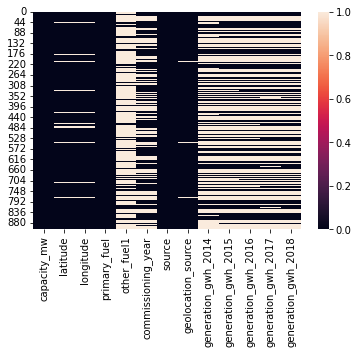

In [28]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

OBSERVATION

White lines in above heatmap shows missing values in the dataset.

## TREATING NULL VALUES 

For using imputation techniques to treat null values,we check  the mean and mode values of the features having null values

In [29]:
#checking the mean of latitude
df['latitude'].mean()

21.19791811846691

In [30]:
#checking the mode of other_fuel1 
df["other_fuel1"].mode()

0    Oil
dtype: object

In [31]:
#checking the mode of geolocation_source columns
df["geolocation_source"].mode()

0    WRI
dtype: object

##### FILLING THE NULL VALUES 

In [32]:
df["latitude"] = df["latitude"].fillna(df["latitude"].mean())
df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])
df["longitude"] = df["longitude"].fillna(df["longitude"].median())
df["commissioning_year"] = df["commissioning_year"].fillna(df["commissioning_year"].median())
df["generation_gwh_2014"] = df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
df["generation_gwh_2015"] = df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
df["generation_gwh_2016"] = df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
df["generation_gwh_2017"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())
df["generation_gwh_2018"] = df["generation_gwh_2018"].fillna(df["generation_gwh_2018"].median())


In [33]:
#checking for missing values after imputation.
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

OBSERVATION

We have treated the null values now and the data now shows no null values

#### FEATURE EXTRACTION 

In [55]:
# Checking the list of counts of commissioning_year
df['commissioning_year'].value_counts()

2001.0    395
2015.0     28
2013.0     25
2012.0     23
2016.0     19
         ... 
1954.0      1
1969.0      1
1939.0      1
1927.0      1
1953.0      1
Name: commissioning_year, Length: 73, dtype: int64

In [56]:
# Let's extract power plant age from commissioning year by subtracting it from the year 2018
df["Power_plant_age"] = 2018 - df["commissioning_year"]
df.drop(columns=["commissioning_year"], inplace = True)

##  STATISTICAL SUMMARY

In [57]:
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030,19.271224
std,590.085456,6.079148,4.815073,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750,13.158621
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,801.123775,711.181225,737.205450,817.977250,751.644375,15.000000
50%,59.200000,21.281800,76.719500,801.123775,711.181225,737.205450,817.977250,751.644375,17.000000
75%,385.250000,25.176450,79.206100,801.123775,711.181225,737.205450,817.977250,751.644375,20.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,91.000000


OBSERVATION


The count of the columns are same, which means the dataset is balanced. The minimum capacity of the power plant is zero and maximum in 4760 and there is huge difference in mean and standard deviation.From the difference between maximum and 75% percentile we can infer that there are huge outliers present in most of the columns, will remove them using appropriate methods before building our model.

In [58]:
#checking the categorical columns
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


In [59]:
#checking the numeric columns for visualization
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print(num_col)      

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Power_plant_age']


## DATA VISUALIZATION

In [60]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'source', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'Power_plant_age'],
      dtype='object')

### UNIVARIATE ANALYSIS 

#### Categorical column visualization 

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


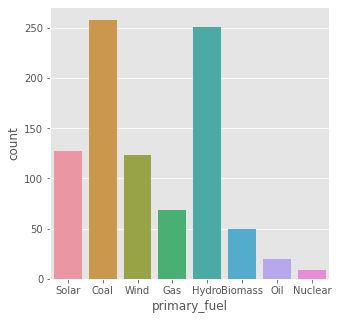

In [61]:
print(df['primary_fuel'].value_counts())   
plt.figure(figsize=(5,5))
sns.countplot(df['primary_fuel'])
plt.show()

OBSERVATION

The highest number of values have been covered by coal and hydro fuel types then comes solar and wind. Finally we see that gas, biomass, oil and nuclear have very low data counts.

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


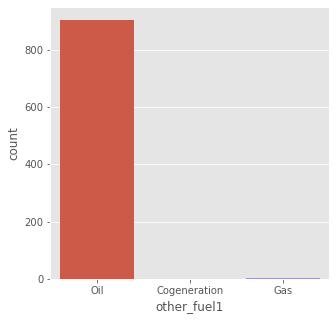

In [62]:
#checking the count of fuel1
print(df['other_fuel1'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df['other_fuel1'])
plt.show()

OBSERVATION

'other_fuel1' type has 3 unique types namely: 'Oil', 'Cogeneration other fuel', 'Gas'. And it is clearly seen that oil is the max used fuel type.

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64


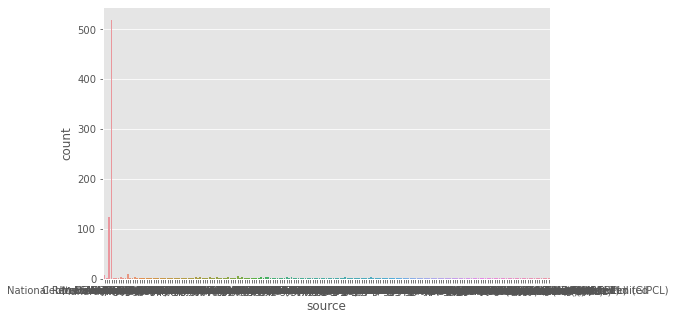

In [63]:
#checking the count of fuel1
print(df['source'].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(df['source'])
plt.show()

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


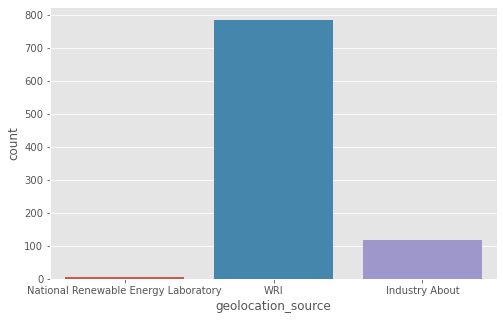

In [64]:
# Visualizing the counts of owner
print(df["geolocation_source"].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
plt.figure(figsize=(8,5))
sns.countplot(df['geolocation_source'])
plt.show()

OBSERVATION

The count of WRI is the max, which means that the max information is shared by this geolocation source.

### NUMERICAL COLUMNS VISUALISATION

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


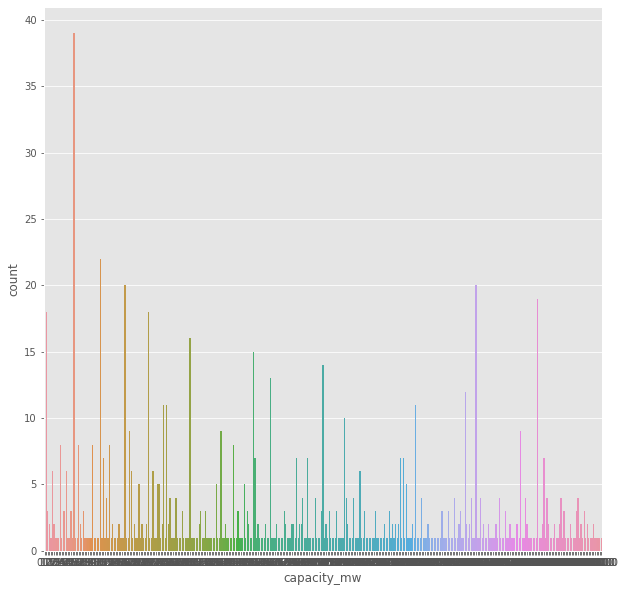

In [65]:
print(df['capacity_mw'].value_counts())   
plt.figure(figsize=(10,10))
sns.countplot(df['capacity_mw'])
plt.show()

#### Checking the Distribution of the Numerical columns of Dataset, if it is normal 

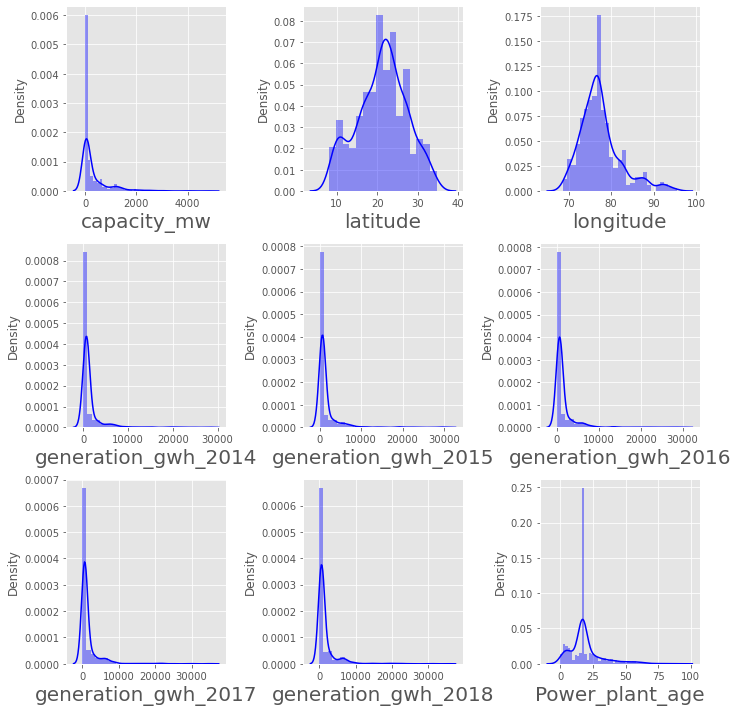

In [66]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color="b")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

OBSERVATION
The data is not normally distributed. Outliers and skewness is present, which needs to be treated.

### BIVARIATE ANALYSIS 

<AxesSubplot:title={'center':'Comparision between geolocation_source and capacity_mw'}, xlabel='geolocation_source', ylabel='capacity_mw'>

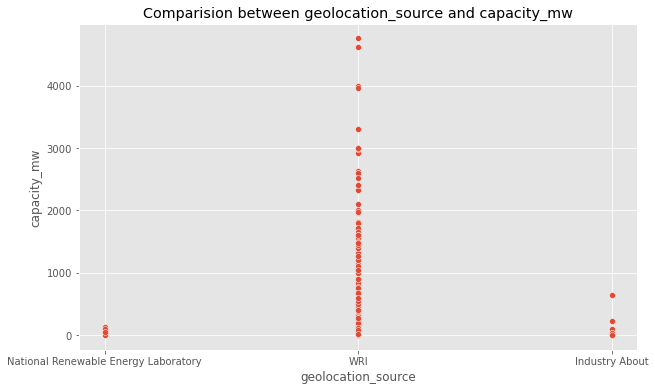

In [67]:
#Checking the relation between target capacity_mw and variable geolocation source
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between geolocation_source and capacity_mw')
sns.scatterplot(df['geolocation_source'],df["capacity_mw"])

<AxesSubplot:title={'center':'Comparision between Power_plant_age and capacity_mw'}, xlabel='Power_plant_age', ylabel='capacity_mw'>

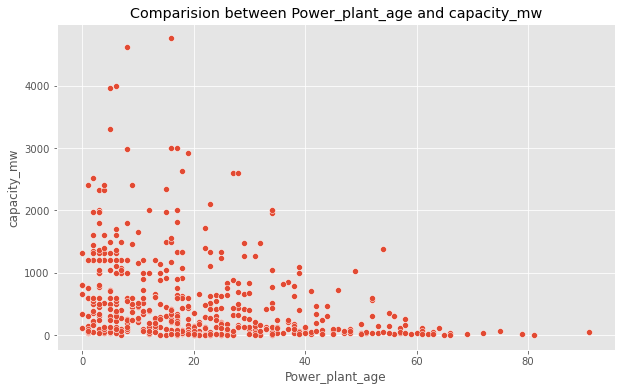

In [68]:
#Checking the relation between power plant age and capacity_mw
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.scatterplot(df['Power_plant_age'],df["capacity_mw"])

OBSERVATION

Neative correlation is visible.

<AxesSubplot:title={'center':'Comparision between latitude and capacity_mw'}, xlabel='latitude', ylabel='capacity_mw'>

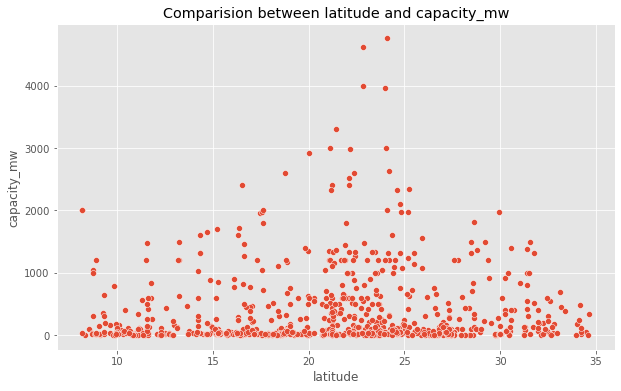

In [69]:
# Checking the relation between feature latitude and targer capacity_mw
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw')
sns.scatterplot(df['latitude'],df["capacity_mw"])

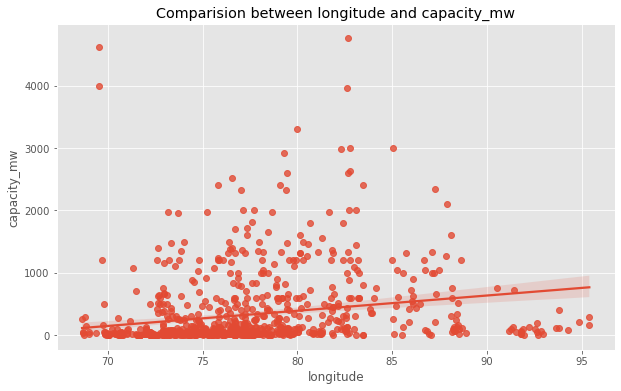

In [70]:
# Checking the relationship between target longitude and capacity_mw
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw')
sns.regplot(df['longitude'],df["capacity_mw"]);

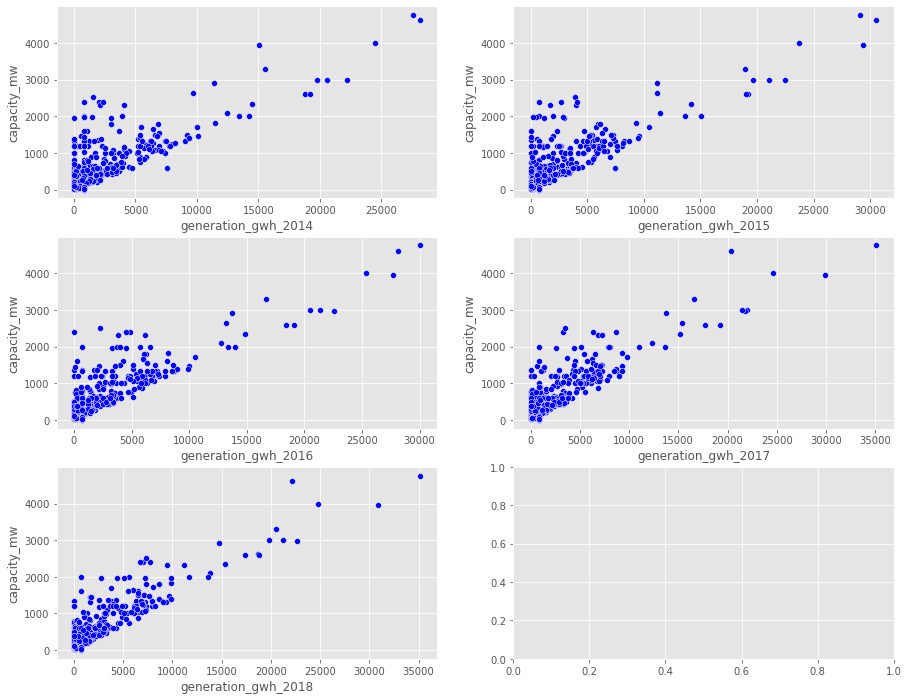

In [71]:
#checking relation of capacity with generation every year
fig,axes=plt.subplots(3,2,figsize=(15,12))

#Checking the relation between feature generation_gwh_2013 and targer capacity_mw
sns.scatterplot(x = "generation_gwh_2014", y = "capacity_mw",ax=axes[0,0],data = df,color="b")

#Checking the relation between feature generation_gwh_2014 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=df,color="b")

#Checking the relation between feature generation_gwh_2015 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=df,color="b")

#Checking the relation between feature generation_gwh_2016 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=df,color="b")

#Checking the relation between feature generation_gwh_2017 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2018',y='capacity_mw',ax=axes[2,0],data=df,color="b")
plt.show()

<AxesSubplot:title={'center':'Comparision between Power_plant_age and primary_fuel'}, xlabel='Power_plant_age', ylabel='primary_fuel'>

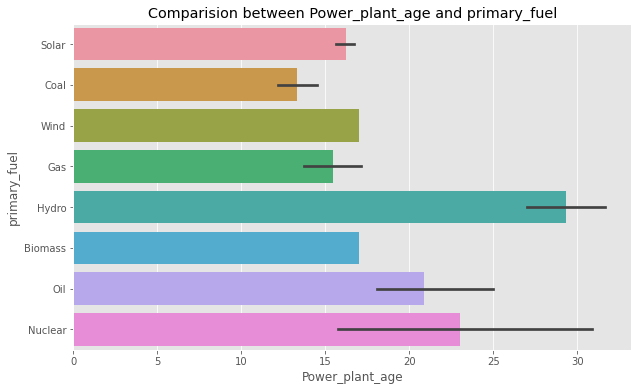

In [73]:
#Checking the relation between target fuel and variable Power_plant_age
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and primary_fuel')
sns.barplot(df['Power_plant_age'],df["primary_fuel"])

<AxesSubplot:title={'center':'Comparision between latitude and primary_fuel'}, xlabel='latitude', ylabel='primary_fuel'>

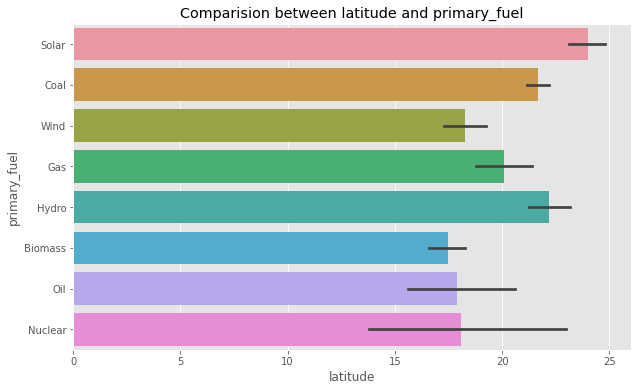

In [74]:
# Checking the relation between feature latitude and targer Fuel
plt.figure(figsize=[10,6])
plt.title('Comparision between latitude and primary_fuel')
sns.barplot(df['latitude'],df["primary_fuel"])

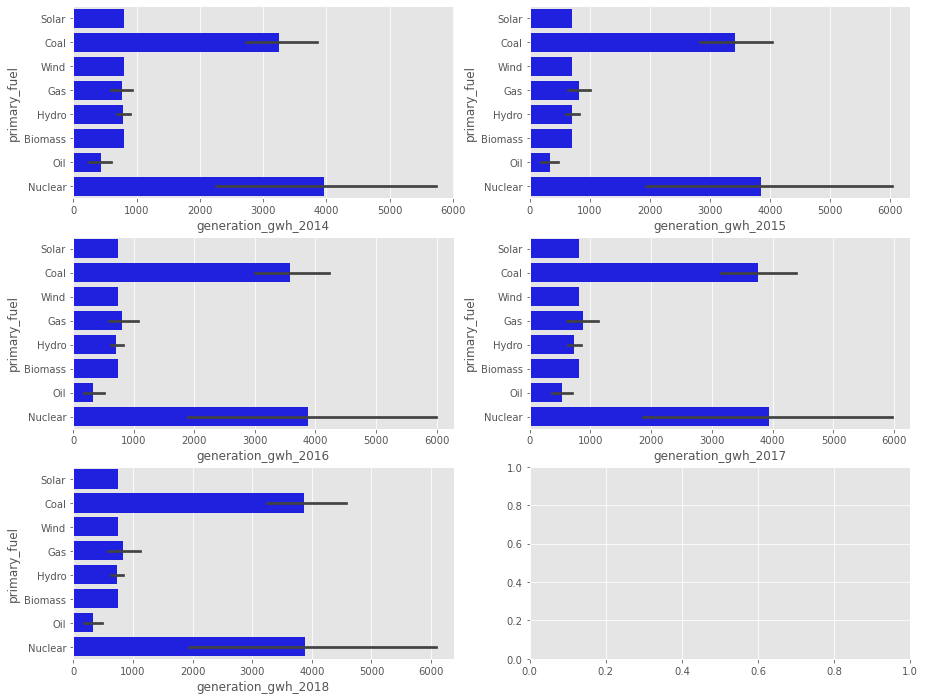

In [75]:
fig,axes=plt.subplots(3,2,figsize=(15,12))

#Checking the relation between feature generation_gwh_2013 and targer primary_fuel
sns.barplot(x = "generation_gwh_2014", y = "primary_fuel",ax=axes[0,0],data = df,color="b")

#Checking the relation between feature generation_gwh_2014 and targer primary_fuel
sns.barplot(x='generation_gwh_2015',y='primary_fuel',ax=axes[0,1],data=df,color="b")

#Checking the relation between feature generation_gwh_2015 and targer primary_fuel
sns.barplot(x='generation_gwh_2016',y='primary_fuel',ax=axes[1,0],data=df,color="b")

#Checking the relation between feature generation_gwh_2016 and targer primary_fuel
sns.barplot(x='generation_gwh_2017',y='primary_fuel',ax=axes[1,1],data=df,color="b")

#Checking the relation between feature generation_gwh_2017 and targer Fprimary_fuel
sns.barplot(x='generation_gwh_2018',y='primary_fuel',ax=axes[2,0],data=df,color="b")
plt.show()

#### Checking the relationship between both the targets 

In [78]:
# defining primary_fuel as Fuel_Type 
df.rename(columns={'primary_fuel':'Fuel_Type'},inplace=True)

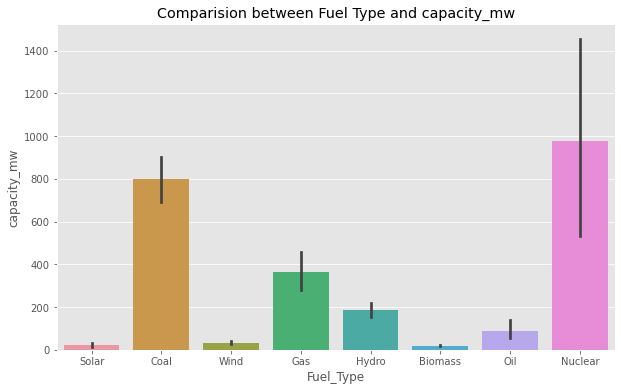

In [79]:
plt.figure(figsize = (10,6))
plt.title("Comparision between Fuel Type and capacity_mw")
sns.barplot(x = "Fuel_Type", y = "capacity_mw", data = df)
plt.show()

## LABEL ENCODING 

In [80]:
categorical_col = ['Fuel_Type', 'other_fuel1', 'source', 'geolocation_source']

In [81]:
LE=LabelEncoder()
df[categorical_col]= df[categorical_col].apply(LE.fit_transform)

In [82]:
df[categorical_col]

,Fuel_Type,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,77,0
904,7,2,21,2
905,1,2,59,2


In [83]:
#checking dataset after label encoding 
df

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,6,2,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,1,2,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,22,2,801.123775,0.994875,233.596650,865.400000,686.500000,2.0
903,3.0,12.8932,78.1654,6,2,77,0,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
904,25.5,15.2758,75.5811,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
905,80.0,24.3500,73.7477,1,2,59,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0


## OUTLIERS 

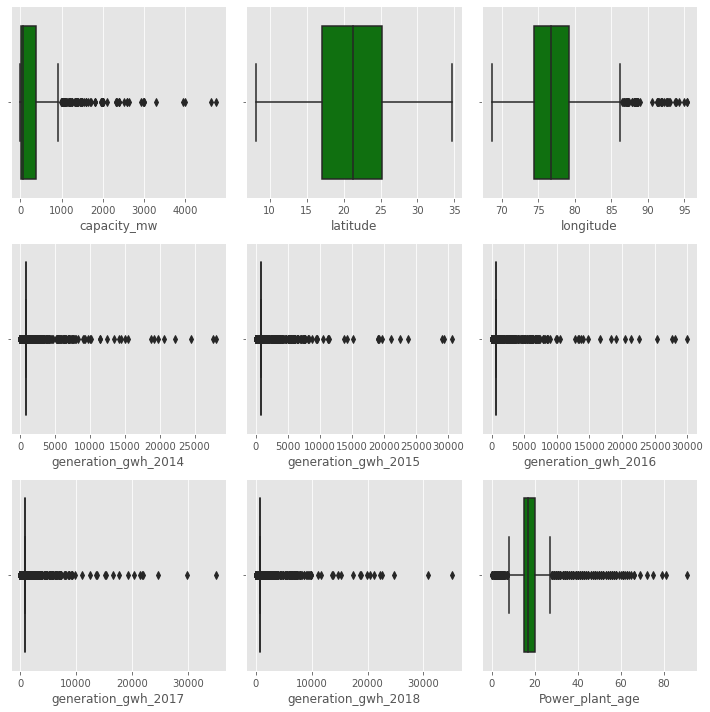

In [84]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="green")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

OBSERVATION

Outliers are present in all the columns except latitude. Even target column has outliers but we dont need to remove it. Let's remove outliers from features column using Zscore method.

### REMOVING OUTLIERS 

In [85]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'Fuel_Type', 'other_fuel1',
       'source', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'Power_plant_age'],
      dtype='object')

In [86]:
#features containing outliers
features = df[['longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018','Power_plant_age']]


In [90]:
#Using zscore to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(features))
z

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,0.869917,0.257022,0.267783,0.275737,0.275565,0.288394,0.933076
1,0.585590,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
2,1.673567,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
3,2.895239,0.322873,0.223348,0.226194,0.326203,0.327990,0.400812
4,1.035238,0.545554,1.476964,1.557432,1.224379,1.772608,1.237227
...,...,...,...,...,...,...,...
902,0.014609,0.257022,0.505833,0.443415,0.259992,0.308963,1.313265
903,0.153415,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
904,0.383592,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
905,0.764564,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699


In [91]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,6,2,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,1,2,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,22,2,801.123775,0.994875,233.596650,865.400000,686.500000,2.0
903,3.0,12.8932,78.1654,6,2,77,0,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
904,25.5,15.2758,75.5811,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
905,80.0,24.3500,73.7477,1,2,59,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0


In [92]:
# Shape of original dataset
df.shape

(907, 13)

In [93]:
# Shape of new dataframe
new_df.shape

(851, 13)

#### LOSS PERCENTAGE 

In [94]:
loss_percent=(907-851)/907*100
print(loss_percent,'%')


6.174200661521499 %


OBSERVATION

6.17 % data loss is acceptable

df_new is the new data set after all the unnecessary columns and all the outliers apart from target columns (with z<3 z score) are removed

## CORRELATION 

In [95]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
capacity_mw,1.000000,0.050588,0.257582,-0.398039,-0.001758,-0.275724,0.234543,0.620202,0.680949,0.750088,0.788972,0.815198,-0.241487
latitude,0.050588,1.000000,-0.014145,-0.002561,0.037049,0.069430,-0.203340,0.081661,0.071346,0.057301,0.071296,0.064558,-0.097033
longitude,0.257582,-0.014145,1.000000,-0.382975,0.029191,-0.235719,0.263739,0.119473,0.154522,0.195299,0.196529,0.204421,-0.080034
Fuel_Type,-0.398039,-0.002561,-0.382975,1.000000,0.006463,0.038558,-0.478601,-0.250101,-0.276308,-0.286624,-0.289232,-0.298364,0.074358
other_fuel1,-0.001758,0.037049,0.029191,0.006463,1.000000,0.028471,-0.022827,-0.000530,0.006092,0.015479,0.011842,0.022700,-0.058103
source,-0.275724,0.069430,-0.235719,0.038558,0.028471,1.000000,-0.497893,-0.141496,-0.156317,-0.158561,-0.156155,-0.165232,-0.075353
geolocation_source,0.234543,-0.203340,0.263739,-0.478601,-0.022827,-0.497893,1.000000,0.113446,0.125329,0.127128,0.125199,0.132477,0.051608
generation_gwh_2014,0.620202,0.081661,0.119473,-0.250101,-0.000530,-0.141496,0.113446,1.000000,0.912185,0.801237,0.746130,0.738063,-0.059768
generation_gwh_2015,0.680949,0.071346,0.154522,-0.276308,0.006092,-0.156317,0.125329,0.912185,1.000000,0.907984,0.830394,0.821726,-0.130252
generation_gwh_2016,0.750088,0.057301,0.195299,-0.286624,0.015479,-0.158561,0.127128,0.801237,0.907984,1.000000,0.932729,0.913720,-0.199087


In [96]:
#correlation with fuel_type
new_df.corr()["Fuel_Type"].sort_values()

geolocation_source    -0.478601
capacity_mw           -0.398039
longitude             -0.382975
generation_gwh_2018   -0.298364
generation_gwh_2017   -0.289232
generation_gwh_2016   -0.286624
generation_gwh_2015   -0.276308
generation_gwh_2014   -0.250101
latitude              -0.002561
other_fuel1            0.006463
source                 0.038558
Power_plant_age        0.074358
Fuel_Type              1.000000
Name: Fuel_Type, dtype: float64

In [97]:
#correlation with capacity
new_df.corr()['capacity_mw'].sort_values()

Fuel_Type             -0.398039
source                -0.275724
Power_plant_age       -0.241487
other_fuel1           -0.001758
latitude               0.050588
geolocation_source     0.234543
longitude              0.257582
generation_gwh_2014    0.620202
generation_gwh_2015    0.680949
generation_gwh_2016    0.750088
generation_gwh_2017    0.788972
generation_gwh_2018    0.815198
capacity_mw            1.000000
Name: capacity_mw, dtype: float64

#### Visualizing the correlation between label and features using bar plot 

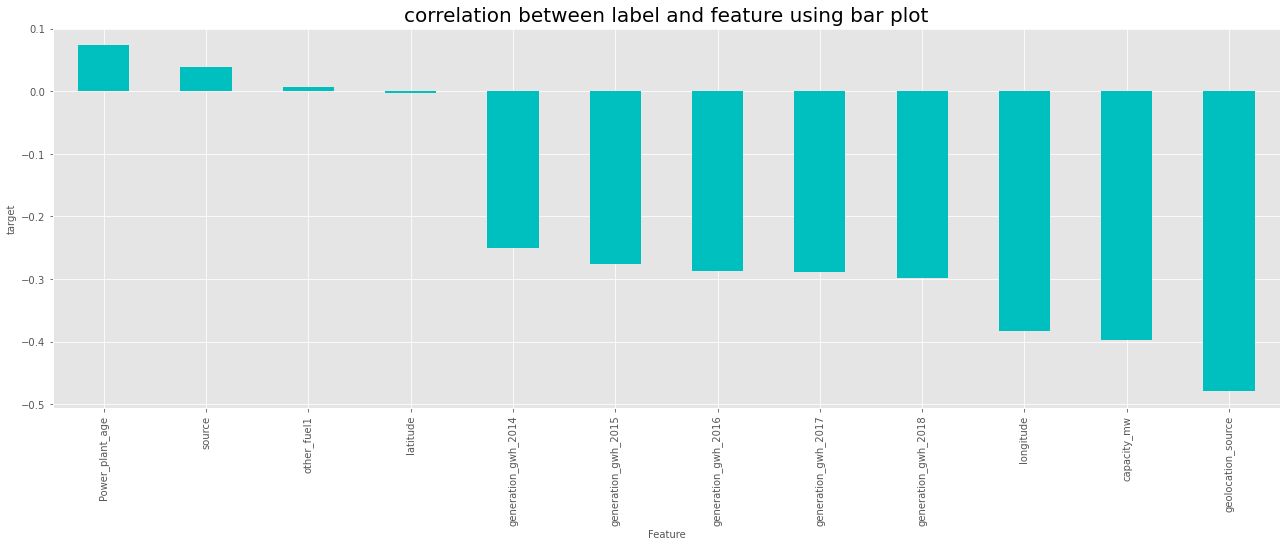

In [98]:
#for fuel_type
plt.figure(figsize=(22,7))
new_df.corr()['Fuel_Type'].sort_values(ascending=False).drop(['Fuel_Type']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

OBSERVATION

Fuel_Type is less correlated with Power_plant_age and source. The label is negatively correlated with geolocation_source, longitude, capacity_mw, and all generation_gwh years

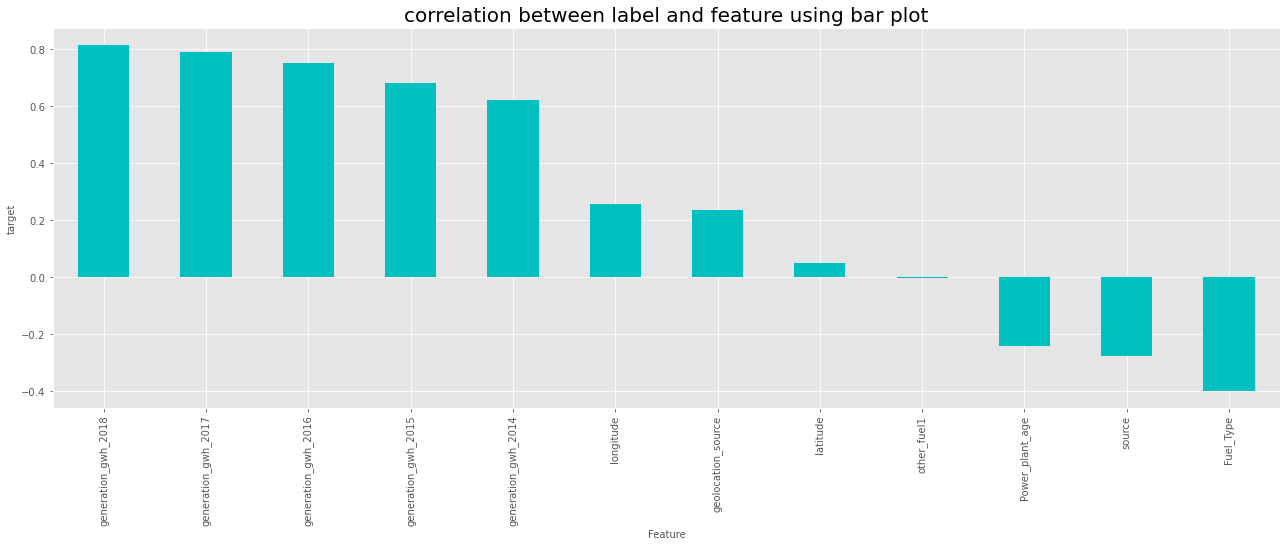

In [99]:
#for fuel_type
plt.figure(figsize=(22,7))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

OBSERVATION

Capacity_mw is highly positively correlated with the features generation_gwh_2017, generation_gwh_2016, generation_gwh_2015, generation_gwh_2014, generation_gwh_2013. And the label is negatively correlated with the features Fuel_Type, source and Power_plant_age. The columns other_fuel1 and latitude have no relation with the label, so we can drop them.

## MultiCollinearity with Variance Inflation Factor 

In [100]:
#copying the dataframe
df1=pd.DataFrame(data=new_df)       
df1

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,6,2,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,1,2,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,22,2,801.123775,0.994875,233.596650,865.400000,686.500000,2.0
903,3.0,12.8932,78.1654,6,2,77,0,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
904,25.5,15.2758,75.5811,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
905,80.0,24.3500,73.7477,1,2,59,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0


In [101]:
#taking capacity_mw as target
x1=df1.iloc[:,1:]
y1=df1.iloc[:,0]

In [102]:
x1

,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,28.1839,73.2407,6,2,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,24.7663,74.6090,1,2,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,21.9038,69.3732,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,23.8712,91.3602,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,21.9603,82.4091,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
902,16.2949,77.3568,1,2,22,2,801.123775,0.994875,233.596650,865.400000,686.500000,2.0
903,12.8932,78.1654,6,2,77,0,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
904,15.2758,75.5811,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
905,24.3500,73.7477,1,2,59,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0


In [103]:
x1.shape

(851, 12)

In [104]:
y1.shape

(851,)

In [105]:
# importing required libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [106]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [107]:
calc_vif(x1)

,variables,VIF FACTOR
0,latitude,13.872461
1,longitude,244.574821
2,Fuel_Type,4.644438
3,other_fuel1,279.902398
4,source,2.932705
5,geolocation_source,13.596524
6,generation_gwh_2014,10.519302
7,generation_gwh_2015,20.375290
8,generation_gwh_2016,22.939038
9,generation_gwh_2017,30.883761


In [108]:
#dropping as it has high VIF
x1=df1.drop(['other_fuel1'],axis=1)

In [109]:
calc_vif(x1)

,variables,VIF FACTOR
0,capacity_mw,4.925265
1,latitude,13.421012
2,longitude,47.409391
3,Fuel_Type,4.210582
4,source,2.833991
5,geolocation_source,12.954951
6,generation_gwh_2014,10.551644
7,generation_gwh_2015,20.382745
8,generation_gwh_2016,22.935981
9,generation_gwh_2017,30.879133


In [110]:
#latitude has the lowest contribution compared to both the targets so dropping it
x1=df1.drop(['other_fuel1','latitude'],axis=1)

In [111]:
calc_vif(x1)

,variables,VIF FACTOR
0,capacity_mw,4.924663
1,longitude,31.060239
2,Fuel_Type,4.210062
3,source,2.832397
4,geolocation_source,12.580994
5,generation_gwh_2014,10.525915
6,generation_gwh_2015,20.377171
7,generation_gwh_2016,22.860138
8,generation_gwh_2017,30.817585
9,generation_gwh_2018,25.665932


#### FEATURE SELECTION 

In [112]:
#dropping these two columns reduced VIF so we ill drop these from our dataset
new_df.drop("other_fuel1",axis=1,inplace=True)
new_df.drop("latitude",axis=1,inplace=True)

In [113]:
new_df.head()

,capacity_mw,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,73.2407,6,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,74.6090,1,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,69.3732,7,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0


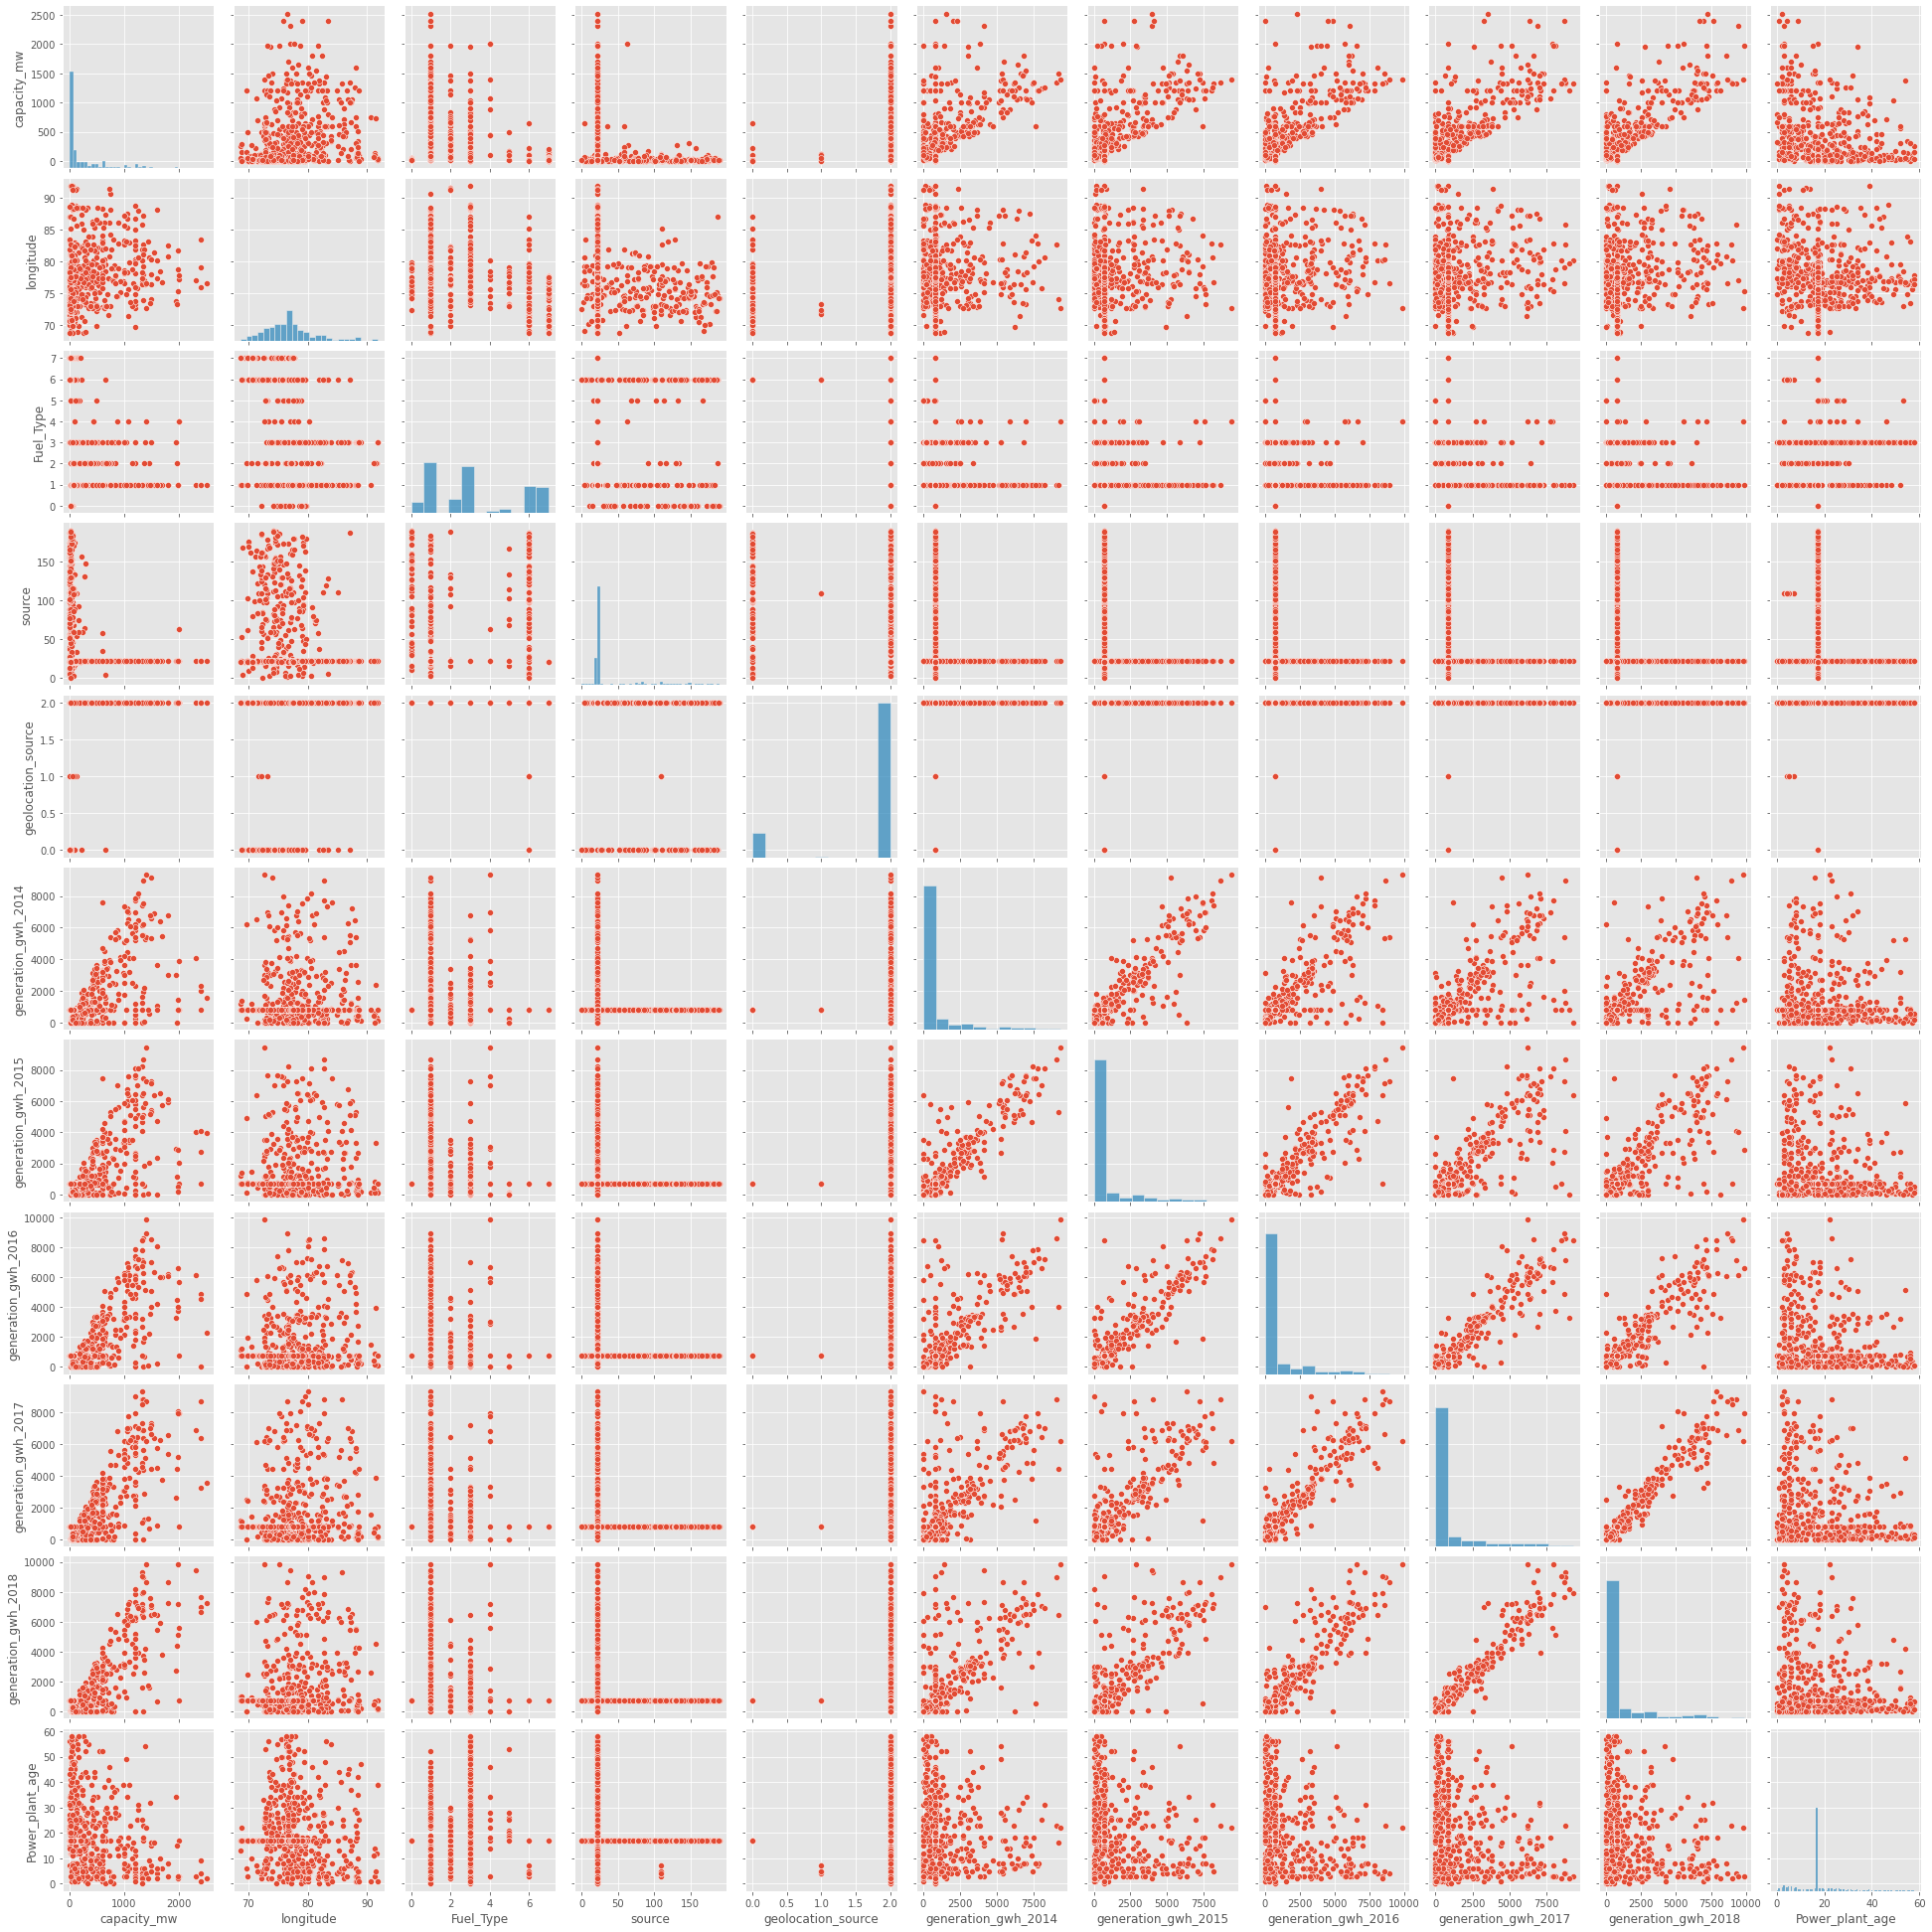

In [114]:
sns.pairplot(new_df)

## SKEWNESS

In [116]:
new_df.skew().sort_values()

geolocation_source    -2.066536
Fuel_Type              0.413759
longitude              0.945877
Power_plant_age        1.280800
source                 1.734252
capacity_mw            2.170245
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
generation_gwh_2016    2.645786
generation_gwh_2015    2.714999
generation_gwh_2014    2.943026
dtype: float64

OBSERVATION 
The following columns have skewness more than +0.5 and -0.5.

longitude generation_gwh_2013 generation_gwh_2014 generation_gwh_2015 generation_gwh_2016 generation_gwh_2017 Power_plant_age

##### REMOVING SKEWNESS USING POWER TRANSFORMER 

In [117]:
from sklearn.preprocessing import PowerTransformer
skew = ['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']
transf = PowerTransformer(method='yeo-johnson')

In [123]:
new_df[skew] = transf.fit_transform(new_df[skew].values)
new_df[skew].head()


,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,-0.499829,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-2.377759,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,2.430594,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.261979,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384


In [124]:
new_df.skew().sort_values()

geolocation_source    -2.066536
longitude             -0.000128
Power_plant_age        0.043734
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
generation_gwh_2016    0.147035
generation_gwh_2015    0.163587
generation_gwh_2014    0.232399
Fuel_Type              0.413759
source                 1.734252
capacity_mw            2.170245
dtype: float64

OBSERVATION

Since Fuel_Type, source and geolocation_source were categorically encoded values we didnt use transformation for skewness removal.
Rest of the numerical data columns the skewness has been removed.

# MACHINE LEARNING

##  Predicting for  "Capacity_mw" as  Target

### Splitting the dataset into Features and Target 

In [125]:
x=new_df.drop('capacity_mw', axis=1)
y=new_df["capacity_mw"]

### STANDARD SCALING 

In [126]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,1.175506,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,-0.499829,-0.975797,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-2.377759,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,2.430594,-0.545536,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.261979,-0.975797,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384
...,...,...,...,...,...,...,...,...,...,...
846,0.231932,-0.975797,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.980960
847,0.421592,1.175506,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
848,-0.224400,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
849,-0.760624,-0.975797,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187


In [127]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.309948,longitude
1,1.682645,Fuel_Type
2,1.503721,source
3,1.875750,geolocation_source
4,3.603333,generation_gwh_2014
5,6.182235,generation_gwh_2015
6,9.957776,generation_gwh_2016
7,9.750143,generation_gwh_2017
8,8.951489,generation_gwh_2018
9,1.102659,Power_plant_age


VIF values in all the columns are less then 10, hence no multicolinearity problem exists

#### FINDING BEST RANDOM STATE 

Since the y (Target) has Continuous values, we will use Linear Regression

In [128]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [129]:
#getting the best random state for .20 test size
maxAccu=0
maxRS=0
for i in range(1,200): 
    x_train,x_test, y_train, y_test =train_test_split(x,y, test_size=.20,random_state=i)
    mod=RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('R2 Score=', maxAccu, 'Random_State',maxRS)

R2 Score= 0.8872231759622797 Random_State 111


In [130]:
#getting the best random state for .30 test size
maxAccu=0
maxRS=0
for i in range(1,200): 
    x_train,x_test, y_train, y_test =train_test_split(x,y, test_size=.30,random_state=i)
    mod=RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('R2 Score=', maxAccu, 'Random_State',maxRS)

R2 Score= 0.8696016092105994 Random_State 185


In [131]:
#train_test_split
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.20, random_state=125)


In [132]:
# importing all the required libraries

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [133]:
# creating a function to run all the regressors

def regressor(model, x, y):
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=125)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Root Mean Square Error (RMSE)
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("Root Mean Square Error is:", rmse)
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score is:", cv_score)
    
    # Result of r2 score - cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [134]:
#Linear Regression
model=LinearRegression()
regressor(model, x, y)

Root Mean Square Error is: 245.2176403143082
R2 Score is: 60.50085415827557
Cross Validation Score is: 54.40434259567007
R2 Score - Cross Validation Score is 6.0965115626054995


In [135]:
#L1 -- Lasso Regression
model=Lasso(alpha=0.001)
regressor(model, x, y)

Root Mean Square Error is: 245.21635902893112
R2 Score is: 60.50126693074731
Cross Validation Score is: 54.40459227008451
R2 Score - Cross Validation Score is 6.096674660662806


In [136]:
#L2 -- Ridge Regression
model=Ridge(alpha=0.001)
regressor(model, x, y)

Root Mean Square Error is: 245.21742268211673
R2 Score is: 60.50092426972306
Cross Validation Score is: 54.40437885767844
R2 Score - Cross Validation Score is 6.09654541204462


In [137]:
#Elastic Net
model=ElasticNet(alpha=0.001)
regressor(model, x, y)


Root Mean Square Error is: 245.14355271630322
R2 Score is: 60.52471830409165
Cross Validation Score is: 54.41670015581644
R2 Score - Cross Validation Score is 6.108018148275207


In [138]:
#Support Vector Regression(rbf)
model=SVR(kernel='rbf')
regressor(model, x, y)

Root Mean Square Error is: 404.7742028213369
R2 Score is: -7.624200572733364
Cross Validation Score is: -11.39657492770902
R2 Score - Cross Validation Score is 3.772374354975656


In [139]:
#Support Vector Regression(poly)
model=SVR(kernel='poly')
regressor(model, x, y)

Root Mean Square Error is: 313.2288103301929
R2 Score is: 35.55226062438119
Cross Validation Score is: 26.42896802921331
R2 Score - Cross Validation Score is 9.123292595167882


In [140]:
#Support Vector Regression(linear)
model=SVR(kernel='linear')
regressor(model, x, y)

Root Mean Square Error is: 274.9566511710502
R2 Score is: 50.339310438897165
Cross Validation Score is: 43.403823512262655
R2 Score - Cross Validation Score is 6.9354869266345105


In [141]:
#Decision Tree Regressor
model=DecisionTreeRegressor(random_state=185)
regressor(model, x, y)

Root Mean Square Error is: 187.37308746005007
R2 Score is: 76.93790736638167
Cross Validation Score is: 58.47826372991043
R2 Score - Cross Validation Score is 18.459643636471235


In [142]:
#Random Forest Regressor
model=RandomForestRegressor(random_state=185)
regressor(model, x, y)

Root Mean Square Error is: 139.00814370136547
R2 Score is: 87.30698556375913
Cross Validation Score is: 78.18575260190738
R2 Score - Cross Validation Score is 9.121232961851746


In [143]:
#K Neighbors Regressor
model=KNeighborsRegressor()
regressor(model, x, y)

Root Mean Square Error is: 162.60726630197928
R2 Score is: 82.63142518925956
Cross Validation Score is: 72.4607518724892
R2 Score - Cross Validation Score is 10.170673316770362


In [144]:
#SGD Regressor
model=SGDRegressor()
regressor(model, x, y)

Root Mean Square Error is: 242.49446147506072
R2 Score is: 61.37327088168265
Cross Validation Score is: 54.82128811690457
R2 Score - Cross Validation Score is 6.5519827647780815


In [145]:
#Gradient Boosting Regressor
model=GradientBoostingRegressor()
regressor(model, x, y)

Root Mean Square Error is: 143.92233279361497
R2 Score is: 86.39368046782567
Cross Validation Score is: 75.13635692006918
R2 Score - Cross Validation Score is 11.2573235477565


In [146]:
#Ada Boost Regressor
model=AdaBoostRegressor(random_state=185)
regressor(model, x, y)

Root Mean Square Error is: 245.9104068013531
R2 Score is: 60.27736014567198
Cross Validation Score is: 57.17664778600504
R2 Score - Cross Validation Score is 3.100712359666936


In [147]:
#Extra Trees Regressor
model=ExtraTreesRegressor(random_state=185)
regressor(model, x, y)

Root Mean Square Error is: 134.33684344695777
R2 Score is: 88.14573681906452
Cross Validation Score is: 78.84837976211605
R2 Score - Cross Validation Score is 9.29735705694847


In [148]:
model=ExtraTreesRegressor()
regressor(model, x, y)

Root Mean Square Error is: 132.5897686311459
R2 Score is: 88.45206550219545
Cross Validation Score is: 79.09076482454958
R2 Score - Cross Validation Score is 9.361300677645872


Comparing all the above the Extra Trees Regressor gives the best results since the R2 Score - Cross Validation Score are closest along with higher Cross Validation Score and the highest R2 score comparing all the models

### HYPER PARAMETER TUNING 

In [149]:
ExtraTreesRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [150]:
# creating parameters list to pass into GridSearchCV

parameters = {'criterion' : ['squared_error', 'absolute_error'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'n_jobs' : [5, 10, 15]}

In [151]:
GCV = GridSearchCV(ExtraTreesRegressor(), parameters, cv=5)

In [152]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_jobs': [5, 10, 15]})

In [153]:
# printing best parameters found by GridSearchCV
GCV.best_params_ 

{'criterion': 'squared_error', 'max_features': 'log2', 'n_jobs': 5}

##### FINAL MODEL 

In [154]:
final_model = ExtraTreesRegressor(criterion = 'absolute_error', max_features = 'log2', n_jobs = 15)


In [155]:
# final fit
final_fit = final_model.fit(x_train,y_train)   


In [156]:
# predicting with best parameters

final_pred = final_model.predict(x_test)   # predicting with best parameters


In [157]:
final_cv_score = (cross_val_score(final_model, x, y, cv=5).mean())*100
print("Cross Validation Score is:", final_cv_score)

Cross Validation Score is: 79.38452373752017


In [158]:
best_r2=r2_score(y_test,final_pred,multioutput='variance_weighted')*100   # checking final r2_score
print("R2 score for the Best Model is:", best_r2)

R2 score for the Best Model is: 89.0348966239328


We used Hyper Parameter Tuning on the final model to obtained the best r2_score and CV score.

##### PLOTTING ExtraTreesRegressor REGRESSOR GRAPH

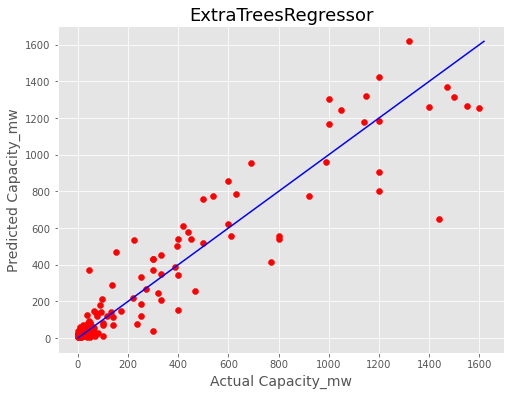

In [159]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=final_pred, color='r')
plt1 = max(max(final_pred), max(y_test))
plt2 = min(min(final_pred), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.xlabel('Actual Capacity_mw', fontsize=14)
plt.ylabel('Predicted Capacity_mw', fontsize=14)
plt.title('ExtraTreesRegressor',fontsize=18)
plt.show()

FINAL OBSERVATION FOR TARGET capacity_mw

Plotting the Final model Actual Capacity_mw vs Predicted Capacity_mw

After Hyper Parameter Tuning on the final model to obtained the best r2_score 89.249% and CV score 79.4% and lowest Root Mean Square Error is: 127.93.

#### SAVING MODEL IN PICKLE FORMAT

# PREDICTED COCLUSION

In [160]:
import numpy as np
a=np.array(y_test)
predicted=np.array(final_model.predict(x_test))
df_comparison = pd.DataFrame({"original":a,"predicted":predicted},index= range(len(a)))
df_comparison

,original,predicted
0,1.00,11.75400
1,1440.00,649.40171
2,55.00,37.77675
3,10.50,11.33390
4,68.80,11.86590
...,...,...
166,1200.00,1425.95080
167,330.00,346.70130
168,10.00,13.07500
169,56.25,23.69990


In [161]:
#saving predicted values to csv
df_comparison.to_csv('Global_Power_Plant_Capacity_mw_Regression_Prediction.csv')


## Predicting for "Fuel_Type" as Target

In [162]:
x_df = new_df.drop("Fuel_Type", axis=1)
y_df = new_df["Fuel_Type"]

## SKEWNESS 

In [163]:
x_df.skew().sort_values()

geolocation_source    -2.066536
longitude             -0.000128
Power_plant_age        0.043734
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
generation_gwh_2016    0.147035
generation_gwh_2015    0.163587
generation_gwh_2014    0.232399
source                 1.734252
capacity_mw            2.170245
dtype: float64

#### REMOVING SKEWNESS USING POWER TRANSFORMER 

In [164]:
skew = ['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
transfo = PowerTransformer(method='yeo-johnson')

In [165]:
x_df[skew] = transfo.fit_transform(x_df[skew].values)
x_df[skew].head()

,capacity_mw,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922017,-0.015816,-0.023850,-0.021809,-0.014102,-0.033504,-1.080965
1,0.220284,-0.499922,-0.015816,-0.023850,-0.021809,-0.014102,-0.033504,0.044852
2,-0.274381,-2.377221,-0.015816,-0.023850,-0.021809,-0.014102,-0.033504,0.044852
3,0.391670,2.431155,-0.244117,0.119032,0.129852,-0.179899,-0.171808,-0.247030
4,1.731859,1.262070,1.395779,2.192289,2.187260,1.925736,2.254026,-1.755543


In [166]:
x_df.skew().sort_values()

geolocation_source    -2.066536
generation_gwh_2014   -0.104472
generation_gwh_2015   -0.094369
generation_gwh_2018   -0.090533
generation_gwh_2016   -0.088905
generation_gwh_2017   -0.069609
longitude              0.000632
capacity_mw            0.016303
Power_plant_age        0.053756
source                 1.734252
dtype: float64

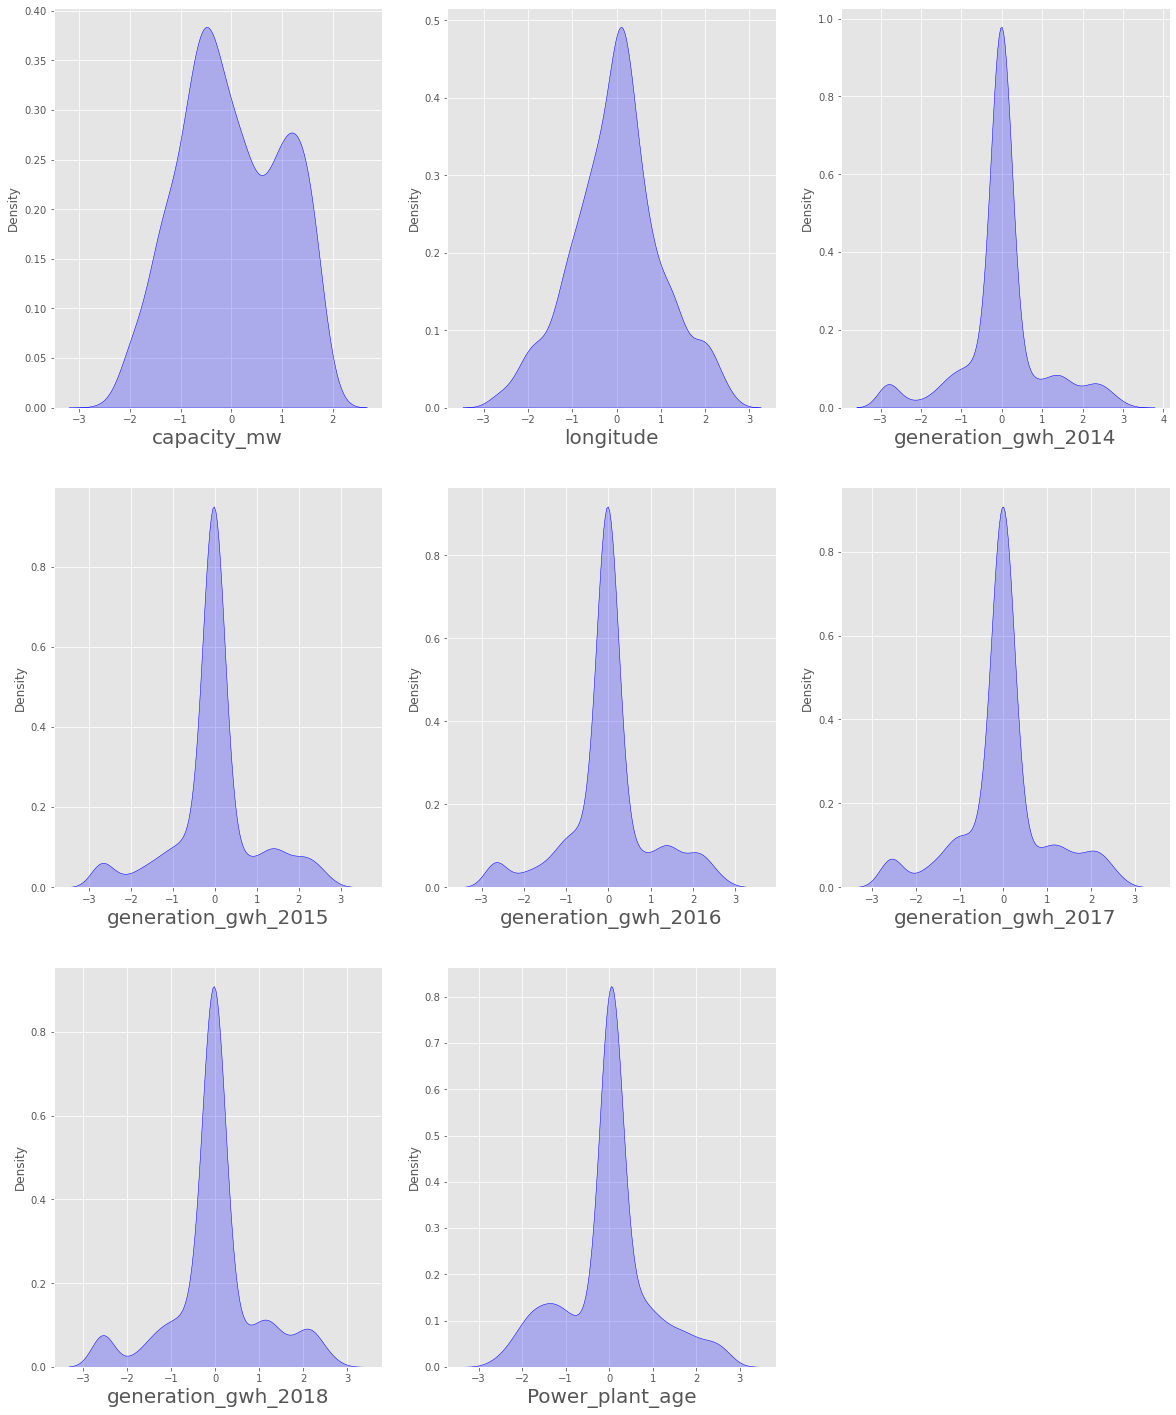

In [167]:
#Lets visualize the data

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_df[column],color='b',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The dataset looks normally distributed now

#### STANDARD SCALING 

In [168]:
scaler=StandardScaler()
x_df=pd.DataFrame(scaler.fit_transform(x_df),columns=x_df.columns)
x_df

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922017,1.397951,-1.036523,-0.015816,-0.023850,-0.021809,-0.014102,-0.033504,-1.080965
1,0.220284,-0.499922,2.821796,0.407145,-0.015816,-0.023850,-0.021809,-0.014102,-0.033504,0.044852
2,-0.274381,-2.377221,-0.529717,0.407145,-0.015816,-0.023850,-0.021809,-0.014102,-0.033504,0.044852
3,0.391670,2.431155,-0.507812,0.407145,-0.244117,0.119032,0.129852,-0.179899,-0.171808,-0.247030
4,1.731859,1.262070,-0.507812,0.407145,1.395779,2.192289,2.187260,1.925736,2.254026,-1.755543
...,...,...,...,...,...,...,...,...,...,...
846,1.672840,0.231807,-0.507812,0.407145,-0.015816,-2.588699,-0.840417,0.032040,-0.102890,-1.977182
847,-1.598186,0.421487,0.696980,-2.480190,-0.015816,-0.023850,-0.021809,-0.014102,-0.033504,0.044852
848,-0.507278,-0.224526,-0.529717,0.407145,-0.015816,-0.023850,-0.021809,-0.014102,-0.033504,0.044852
849,0.111201,-0.760667,0.302685,0.407145,-0.015816,-0.023850,-0.021809,-0.014102,-0.033504,0.044852


#### MultiCollinearity with Variance Inflation Factor 

In [169]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_df.values,i)
              for i in range(len(x_df.columns))]
vif["Features"] = x_df.columns

# Let's check the values
vif

,VIF values,Features
0,1.781978,capacity_mw
1,1.193998,longitude
2,1.414042,source
3,1.588987,geolocation_source
4,3.437119,generation_gwh_2014
5,5.812844,generation_gwh_2015
6,9.496608,generation_gwh_2016
7,9.017317,generation_gwh_2017
8,8.451692,generation_gwh_2018
9,1.149833,Power_plant_age


All the columns has vif values less then 10, hence there is no multicolinearity that exist.

In [170]:
y_df.value_counts()

1    238
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: Fuel_Type, dtype: int64

OBSERVATION

We can see that the target Fuel_Type has multiple classes in the mode of energy source, hence we can see that this is a multi classification problem. As the data between the classes are not balanced with 1 having 238 counts and 4 having only 9 counts, we have to do SMOTE oversampling of the data.

### SMOTE 

In [171]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_df, y_df = sm.fit_resample(x_df,y_df)

In [172]:
y_df.value_counts()

6    238
1    238
7    238
2    238
3    238
0    238
5    238
4    238
Name: Fuel_Type, dtype: int64

In [173]:
#renaming the feature variable
X = x_df

In [174]:
#renaming the target variable
Y = y_df 

# MACHINE LEARNING

### FINDING BEST RANDOM STATE 

##### Since the y (Target) has Categorical values, we will use Logistic Regression

In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [176]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test, y_train, y_test=train_test_split(X,Y,test_size=.20, random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS) 

Best accuracy is  0.94750656167979  on Random_state  142


OBSERVATION
Best accuracy score as 0.952 at Random_state 142 in RandomForestClassifier

In [177]:
#train_test_split
x_train,x_test, y_train, y_test=train_test_split(X,Y,test_size=.20, random_state=142)


In [178]:
# Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [179]:
# creating a function to run all the classifiers

def classifier(model, X, Y):
    x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=142) 
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [180]:
#Logistic Regression
model = LogisticRegression()
classifier(model, X, Y)

Accuracy Score: 71.12860892388451

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.84      0.78        49
           1       0.44      0.32      0.38        37
           2       0.64      0.33      0.44        42
           3       0.52      0.49      0.51        47
           4       0.61      0.97      0.75        39
           5       0.88      0.72      0.79        50
           6       1.00      1.00      1.00        63
           7       0.67      0.81      0.73        54

    accuracy                           0.71       381
   macro avg       0.69      0.69      0.67       381
weighted avg       0.71      0.71      0.70       381

Cross Validation Score: 70.48142008564719

Accuracy Score - Cross Validation Score is 0.6471888382373265


In [181]:
#Gaussian Naive Bayes
model = GaussianNB()
classifier(model, X, Y)

Accuracy Score: 64.56692913385827

Classification Report:
               precision    recall  f1-score   support

           0       0.56      1.00      0.72        49
           1       0.67      0.11      0.19        37
           2       0.50      0.02      0.05        42
           3       0.32      0.70      0.44        47
           4       0.77      0.69      0.73        39
           5       0.94      0.30      0.45        50
           6       0.80      1.00      0.89        63
           7       1.00      1.00      1.00        54

    accuracy                           0.65       381
   macro avg       0.69      0.60      0.56       381
weighted avg       0.71      0.65      0.59       381

Cross Validation Score: 60.29327255145739

Accuracy Score - Cross Validation Score is 4.273656582400875


In [182]:
#SVC Classifier(rbf)
model = SVC(kernel='rbf')
classifier(model, X, Y)

Accuracy Score: 80.5774278215223

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78        49
           1       0.65      0.46      0.54        37
           2       0.72      0.69      0.71        42
           3       0.94      0.62      0.74        47
           4       0.80      1.00      0.89        39
           5       0.87      0.80      0.83        50
           6       1.00      1.00      1.00        63
           7       0.68      0.96      0.79        54

    accuracy                           0.81       381
   macro avg       0.80      0.79      0.78       381
weighted avg       0.82      0.81      0.80       381

Cross Validation Score: 78.88520513883132

Accuracy Score - Cross Validation Score is 1.692222682690982


In [183]:
#SVC Classifier(linear)
model = SVC(kernel='linear')
classifier(model, X, Y)

Accuracy Score: 79.00262467191601

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87        49
           1       0.55      0.43      0.48        37
           2       0.70      0.50      0.58        42
           3       0.56      0.64      0.59        47
           4       0.81      1.00      0.90        39
           5       0.93      0.84      0.88        50
           6       1.00      1.00      1.00        63
           7       0.78      0.83      0.80        54

    accuracy                           0.79       381
   macro avg       0.77      0.77      0.77       381
weighted avg       0.79      0.79      0.78       381

Cross Validation Score: 77.7300732145324

Accuracy Score - Cross Validation Score is 1.2725514573836136


In [184]:
#SVC Classifier(poly)
model = SVC(kernel='poly')
classifier(model, X, Y)

Accuracy Score: 69.5538057742782

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.61      0.66        49
           1       0.90      0.49      0.63        37
           2       0.80      0.38      0.52        42
           3       0.77      0.57      0.66        47
           4       0.94      0.79      0.86        39
           5       1.00      0.56      0.72        50
           6       1.00      0.97      0.98        63
           7       0.38      1.00      0.55        54

    accuracy                           0.70       381
   macro avg       0.81      0.67      0.70       381
weighted avg       0.81      0.70      0.71       381

Cross Validation Score: 66.43707694432932

Accuracy Score - Cross Validation Score is 3.116728829948883


In [185]:
#Decision Tree Classifier
model = DecisionTreeClassifier()
classifier(model, X, Y)

Accuracy Score: 91.33858267716536

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        49
           1       0.81      0.70      0.75        37
           2       0.86      0.74      0.79        42
           3       0.87      0.83      0.85        47
           4       0.83      0.97      0.89        39
           5       0.92      0.96      0.94        50
           6       1.00      1.00      1.00        63
           7       1.00      1.00      1.00        54

    accuracy                           0.91       381
   macro avg       0.90      0.90      0.90       381
weighted avg       0.91      0.91      0.91       381

Cross Validation Score: 87.70962840171293

Accuracy Score - Cross Validation Score is 3.628954275452429


In [186]:
#KNeighbors Classifier
model = KNeighborsClassifier()
classifier(model, X, Y)

Accuracy Score: 87.4015748031496

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90        49
           1       0.74      0.46      0.57        37
           2       0.80      0.86      0.83        42
           3       0.89      0.68      0.77        47
           4       0.83      1.00      0.91        39
           5       0.90      0.92      0.91        50
           6       1.00      1.00      1.00        63
           7       0.87      0.98      0.92        54

    accuracy                           0.87       381
   macro avg       0.86      0.86      0.85       381
weighted avg       0.87      0.87      0.87       381

Cross Validation Score: 86.2387070037298

Accuracy Score - Cross Validation Score is 1.1628677994198


In [187]:
#SGD Classifier
model = SGDClassifier()
classifier(model, X, Y)

Accuracy Score: 58.79265091863517

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.71      0.65        49
           1       0.29      0.38      0.33        37
           2       0.52      0.31      0.39        42
           3       0.31      0.49      0.38        47
           4       0.51      0.51      0.51        39
           5       0.93      0.28      0.43        50
           6       1.00      1.00      1.00        63
           7       0.71      0.78      0.74        54

    accuracy                           0.59       381
   macro avg       0.61      0.56      0.55       381
weighted avg       0.64      0.59      0.59       381

Cross Validation Score: 62.3942533499102

Accuracy Score - Cross Validation Score is -3.601602431275033


In [188]:
#Random Forest Classifier
model = RandomForestClassifier(random_state=142)
classifier(model, X, Y)

Accuracy Score: 95.2755905511811

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        49
           1       0.93      0.73      0.82        37
           2       0.93      0.93      0.93        42
           3       0.94      0.96      0.95        47
           4       0.93      1.00      0.96        39
           5       0.92      0.94      0.93        50
           6       1.00      1.00      1.00        63
           7       1.00      1.00      1.00        54

    accuracy                           0.95       381
   macro avg       0.95      0.94      0.94       381
weighted avg       0.95      0.95      0.95       381

Cross Validation Score: 91.43845835060091

Accuracy Score - Cross Validation Score is 3.837132200580186


In [189]:
#ExtraTrees Classifier
model = ExtraTreesClassifier()
classifier(model, X, Y)

Accuracy Score: 95.01312335958005

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        49
           1       0.93      0.73      0.82        37
           2       0.89      0.95      0.92        42
           3       0.89      0.87      0.88        47
           4       0.97      1.00      0.99        39
           5       0.96      0.98      0.97        50
           6       1.00      1.00      1.00        63
           7       0.98      1.00      0.99        54

    accuracy                           0.95       381
   macro avg       0.95      0.94      0.94       381
weighted avg       0.95      0.95      0.95       381

Cross Validation Score: 91.96339273380302

Accuracy Score - Cross Validation Score is 3.0497306257770305


In [190]:
#AdaBoost Classifier
model = AdaBoostClassifier()
classifier(model, X, Y)

Accuracy Score: 29.92125984251969

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.17      0.38      0.23        37
           2       0.00      0.00      0.00        42
           3       0.00      0.00      0.00        47
           4       0.17      1.00      0.28        39
           5       0.00      0.00      0.00        50
           6       1.00      0.97      0.98        63
           7       0.00      0.00      0.00        54

    accuracy                           0.30       381
   macro avg       0.17      0.29      0.19       381
weighted avg       0.20      0.30      0.21       381

Cross Validation Score: 27.731040198922507

Accuracy Score - Cross Validation Score is 2.1902196435971817


In [191]:
#Gradient Boosting Classifier
model = GradientBoostingClassifier()
classifier(model, X, Y)

Accuracy Score: 91.86351706036746

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        49
           1       0.76      0.68      0.71        37
           2       0.90      0.86      0.88        42
           3       0.83      0.81      0.82        47
           4       0.91      1.00      0.95        39
           5       0.94      0.92      0.93        50
           6       1.00      1.00      1.00        63
           7       1.00      1.00      1.00        54

    accuracy                           0.92       381
   macro avg       0.91      0.91      0.91       381
weighted avg       0.92      0.92      0.92       381

Cross Validation Score: 90.38817516231524

Accuracy Score - Cross Validation Score is 1.4753418980522213


OBSERVATION

Comparing all the above the ExtraTreesClassifier gives the best results since the Accuracy Score - Cross Validation Score is the least along with higher Cross Validation Score and the highest Accuracy Score comparing all the models.

### HYPER PARAMETER TUNING 

In [192]:

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.20,random_state=142)


In [193]:
# creating parameters list to pass into GridSearchCV

parameters = {'criterion' : ['gini', 'entropy'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'n_jobs' : [5, 10, 15]}

In [194]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)

In [195]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_jobs': [5, 10, 15]})

In [196]:
# printing best parameters found by GridSearchCV
GCV.best_params_  

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_jobs': 15}

##### FINAL MODEL 

In [197]:
#final model with best parameters
final_modelc = ExtraTreesClassifier(criterion = 'gini', max_features = 'log2', n_jobs = 5)   


In [198]:
#final fit
final_fitc = final_modelc.fit(x_train,y_train) 


In [199]:
#predicting with best parameters
final_predc = final_modelc.predict(x_test)  


In [200]:
best_acc_score = (accuracy_score(y_test, final_predc))*100   
print("The Accuracy Score for the Best Model is ", best_acc_score)

The Accuracy Score for the Best Model is  94.22572178477691


In [201]:
# Final Classification Report
final_class_report = classification_report(y_test, final_predc)
print("\nClassification Report:\n", final_class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        49
           1       0.87      0.73      0.79        37
           2       0.91      0.95      0.93        42
           3       0.85      0.85      0.85        47
           4       0.97      1.00      0.99        39
           5       0.96      0.94      0.95        50
           6       1.00      1.00      1.00        63
           7       1.00      1.00      1.00        54

    accuracy                           0.94       381
   macro avg       0.94      0.93      0.93       381
weighted avg       0.94      0.94      0.94       381



In [202]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

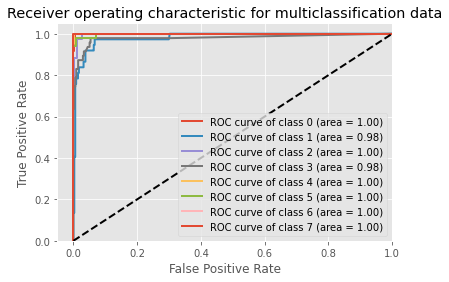

In [203]:
classifier = OneVsRestClassifier(final_modelc)
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

#Binarize the output
y_test_bin  = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7])
n_classes = 8

# Compute ROC curve and AUC for all the classes
false_positive_rate = dict()
true_positive_rate = dict()
roc_auc = dict()
for i in range(n_classes):
    false_positive_rate[i], true_positive_rate[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(false_positive_rate[i], true_positive_rate[i])
    
   
for i in range(n_classes):
    plt.plot(false_positive_rate[i], true_positive_rate[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiclassification data')
plt.legend(loc="lower right")
plt.show()


OBSERVATION

We got AUC ROC curve for all 8 classes which is either 0.98 or 1 which is good

### SAVING MODEL IN PICKLE FORMAT 

In [204]:
# pickeling or serialization of a file
import pickle
filenamec = 'Global_Power_Plant_Fuel_Type_Classification_final_model.pkl'
pickle.dump(final_modelc, open(filenamec, 'wb'))

## PREDICTED COCLUSION 

In [205]:
import numpy as np
ac=np.array(y_test)
predictedc=np.array(final_modelc.predict(x_test))
df_comparisonc = pd.DataFrame({"original":ac,"predicted":predictedc},index= range(len(ac)))
df_comparisonc

,original,predicted
0,0,0
1,5,5
2,5,5
3,2,2
4,7,7
...,...,...
376,6,6
377,7,7
378,0,0
379,4,4


In [206]:
#saving predicted values to csv
df_comparisonc.to_csv('Global_Power_Plant_Fuel_Type_Classification_Prediction.csv')


FINAL OBSERVATION FOR TARGET Fuel_type



The best  Classifier for model building with this target is ExtraTreesClassifier.
This classifier gave the best Accuracy Score as 95%.

.......................................................................................................................................................................................................................................